# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [1]:
import pickle
with open(r"C:\Users\anshi\Downloads\glove_vectors", 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [2]:
import nltk
nltk.download('vader_lexicon')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [4]:
import pandas as pd
data = pd.read_csv(r"C:\Users\anshi\Downloads\preprocessed_data-DT.csv")

In [5]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


## Data Spliting
Since we will be applying grid search so wont need to separate cv.

In [6]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [7]:
tfidf_features=[]

## Data Preprocessing of categorical features

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
for i in vectorizer.get_feature_names():
    tfidf_features.append(i)
print(len(tfidf_features))

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
51


In [9]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
for i in vectorizer.get_feature_names():
    tfidf_features.append(i)
print(len(tfidf_features))

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
56


In [10]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
for i in vectorizer.get_feature_names():
    tfidf_features.append(i)
print(len(tfidf_features))

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
60


## Data Preprocessing of numerical features


In [11]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

tfidf_features.append("price")
print(len(tfidf_features))

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)
61


In [12]:
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_projectcount_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_projectcount_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


print("After vectorizations")
print(X_train_projectcount_norm.shape, y_train.shape)
print(X_test_projectcount_norm.shape, y_test.shape)
print("="*100)

tfidf_features.append("teacher_number_of_previously_posted_projects")
print(len(tfidf_features))

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)
62


## Data Preprocessing of textual features


In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(X_train['essay'].values)

X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)
for i in vectorizer.get_feature_names():
    tfidf_features.append(i)
print(len(tfidf_features))

(73196, 8) (73196,)
(36052, 8) (36052,)
After vectorizations
(73196, 146720) (73196,)
(36052, 146720) (36052,)
146782


## Sentiment Analysis for both train and test data

In [14]:
sid = SentimentIntensityAnalyzer()
essays = X_train['essay']
essays_sentiments_train=[]
for essay in essays:
    res = sid.polarity_scores(essay)
    essays_sentiments_train.append(res['compound'])
    
X_train['essay_sentiments'] = essays_sentiments_train

In [15]:
sid = SentimentIntensityAnalyzer()
essays = X_test['essay']
essays_sentiments_test=[]
for essay in essays:
    res = sid.polarity_scores(essay)
    essays_sentiments_test.append(res['compound'])
    
X_test['essay_sentiments'] = essays_sentiments_test

In [16]:
sentiment_test=X_test['essay_sentiments'].values.reshape(-1,1)
sentiment_train=X_train['essay_sentiments'].values.reshape(-1,1)

## Data merging - Set1

In [17]:
from scipy.sparse import hstack
x_train_set1 = hstack((X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_price_norm,
                            X_train_projectcount_norm,X_train_essay_bow,sentiment_train)).tocsr()
x_test_set1=hstack((X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_price_norm,
                            X_test_projectcount_norm,X_test_essay_bow,sentiment_test)).tocsr()

## Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_tfidf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
classifier = GridSearchCV(dt_tfidf, parameters, cv= 3, scoring='roc_auc',verbose=1,return_train_score=True,n_jobs=-1)
classifier.fit(x_train_set1,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc', verbose=1)

1. What is best score in decision trees?? 

In [19]:
train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']

cv_auc = classifier.cv_results_['mean_test_score']
cv_auc_std= classifier.cv_results_['std_test_score']

bestMaxDepth_set1=classifier.best_params_['max_depth']
bestMinSampleSplit_set1=classifier.best_params_['min_samples_split']

print("Depth: ",classifier.best_params_['max_depth'])
print("Best Score: ",classifier.best_score_)
print("Sample Split: ",classifier.best_params_['min_samples_split'])

Depth:  10
Best Score:  0.6235243398455684
Sample Split:  500


Text(0.5, 1.0, 'CV Set')

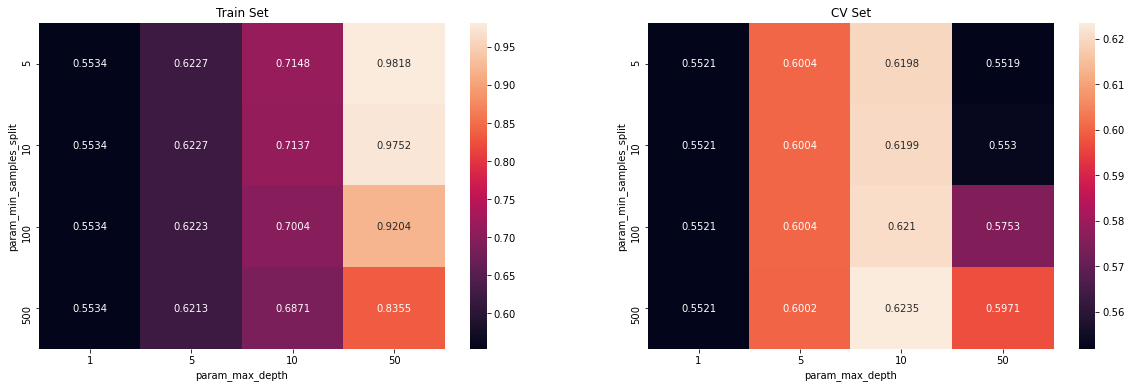

In [20]:
#https://stackoverflow.com/questions/56302647/how-to-plot-a-heatmap-and-find-best-hyperparameter-for-decision-tree-after-grids
import seaborn as sns
import matplotlib.pyplot as plt
results = pd.DataFrame.from_dict(classifier.cv_results_)

max_scores = results.groupby(['param_min_samples_split', 'param_max_depth']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g',ax=ax[0]);
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g',ax=ax[1]);

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

## Model training with best hyperparameters

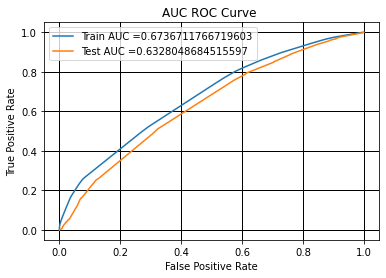

In [21]:
from sklearn.metrics import roc_curve, auc
classifier_ = DecisionTreeClassifier(random_state=42,class_weight='balanced',min_samples_split=500,max_depth=10)
classifier_.fit(x_train_set1,y_train)

y_pred=classifier_.predict(x_test_set1)
y_train_pred = classifier_.predict_proba(x_train_set1)[:,1]     
y_test_pred = classifier_.predict_proba(x_test_set1)[:,1] 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC Curve ")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [22]:
import numpy as np
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),3), "for threshold", np.round(t,3))
    return t

In [23]:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [24]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Threshold", best_t)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("tn, fp, fn, tp", "=", confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)).ravel())
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
print("tn, fp, fn, tp", "=", confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)).ravel())

the maximum value of tpr*(1-fpr) 0.37 for threshold 0.508
Threshold 0.5083568340008916
Train confusion matrix
[[ 7811  3272]
 [29516 32597]]
tn, fp, fn, tp = [ 7811  3272 29516 32597]
Test confusion matrix
[[ 3663  1796]
 [14790 15803]]
tn, fp, fn, tp = [ 3663  1796 14790 15803]


## Confusion Matrix for test data

<AxesSubplot:>

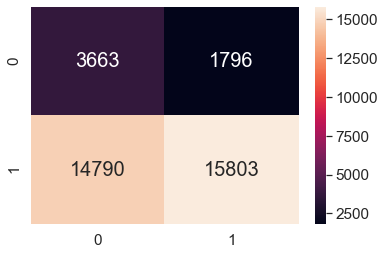

In [25]:
cf_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cf_test,annot=True, annot_kws={"size": 20},fmt ="g")

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image # for masking i.e print word in the pattern we want
import pandas as pd

# Read 'Youtube04-Eminem.csv' files
# using encoding = "latin-1" to get vertical words arrangement along with horizontal once
# dataFrame = pd.read_csv(r"Youtube04-Eminem.csv", encoding = "latin-1")
# dataFrame.head()
def printWordCloud(FP_list):
    comment_words = ''
    stopwords = set(STOPWORDS) 

    # for val in dataFrame.CONTENT: 
    for val in FP_list: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)

## False Positive Datapoints

In [27]:
FP_datapoints=[]
for i in range(len(y_test)):    
    if(y_test[i]==0 and y_pred[i]==1 ):        
        FP_datapoints.append(i)
FP_datapoints_essay=[]
FP_datapoints_price=[]
FP_datapoints_previous=[]

for i in FP_datapoints:
    FP_datapoints_essay.append(X_test['essay'].values[i])
    FP_datapoints_price.append(X_test['price'].values[i])
    FP_datapoints_previous.append(X_test['teacher_number_of_previously_posted_projects'].values[i])

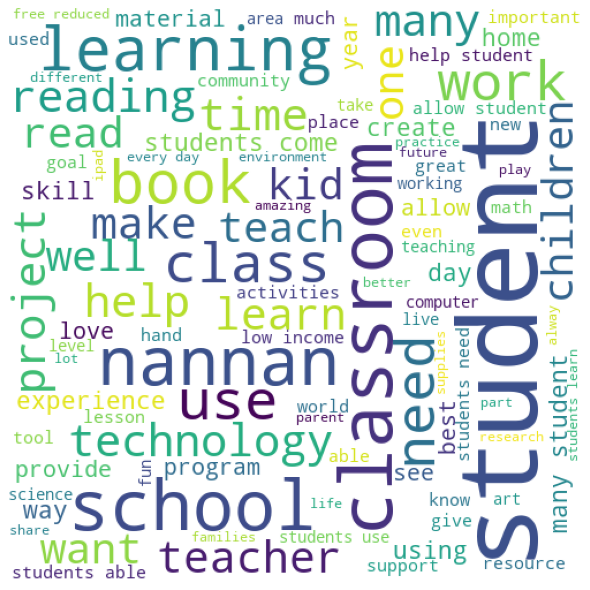

In [28]:
printWordCloud(FP_datapoints_essay)

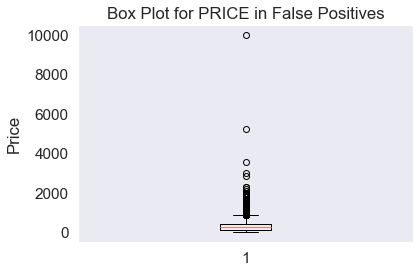

In [29]:
plt.boxplot(FP_datapoints_price)
plt.title('Box Plot for PRICE in False Positives')
plt.ylabel('Price')
plt.grid()

No handles with labels found to put in legend.


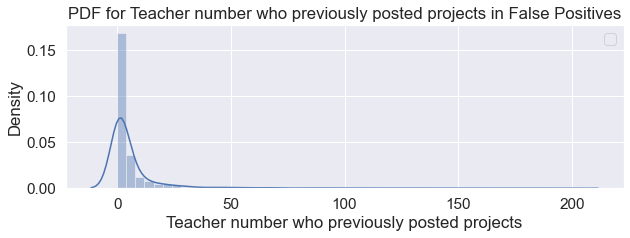

In [30]:
plt.figure(figsize=(10,3))
sns.distplot(FP_datapoints_previous)
plt.title('PDF for Teacher number who previously posted projects in False Positives')
plt.xlabel('Teacher number who previously posted projects')
plt.legend()

### Set 2

In [31]:
import numpy as np
def TFIDF_W2V(feature, unique_words,idf_dict):
    doc=[]
    for sentence in feature:
        vector=np.zeros(300)
        tf_idf_weight=0
        
        for word in sentence.split():
            if(word in glove_words) and (word in unique_words):
                w2vec = model[word] 
                tf=sentence.count(word)/len(sentence.split())
                idf=idf_dict[word]
                tf_idf =tf*idf
                vector += (w2vec * tf_idf)
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
            
        doc.append(vector)
    return doc

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])

essay_dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
essay_unique_words = set(tfidf_model.get_feature_names())

train_essay=TFIDF_W2V(X_train['essay'],essay_unique_words,essay_dictionary)
test_essay=TFIDF_W2V(X_test['essay'],essay_unique_words,essay_dictionary)

In [33]:
x_train_set2 = hstack((X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_price_norm,
                            X_train_projectcount_norm,train_essay,sentiment_train)).tocsr()
x_test_set2=hstack((X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_price_norm,
                            X_test_projectcount_norm,test_essay,sentiment_test)).tocsr()

## Hyperparameter Tuning

In [34]:
dt_tfidf_set2 = DecisionTreeClassifier(random_state=42, class_weight='balanced')

parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
classifier_set2 = GridSearchCV(dt_tfidf, parameters, cv= 3, scoring='roc_auc',verbose=1,return_train_score=True,n_jobs=-1)
classifier_set2.fit(x_train_set2,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [35]:
train_auc= classifier_set2.cv_results_['mean_train_score']
train_auc_std= classifier_set2.cv_results_['std_train_score']

cv_auc = classifier_set2.cv_results_['mean_test_score']
cv_auc_std= classifier_set2.cv_results_['std_test_score']

bestMaxDepth_set2=classifier_set2.best_params_['max_depth']
bestMinSampleSplit_set2=classifier_set2.best_params_['min_samples_split']

print("Depth: ",classifier_set2.best_params_['max_depth'])
print("Best Score: ",classifier_set2.best_score_)
print("Sample Split: ",classifier_set2.best_params_['min_samples_split'])

Depth:  5
Best Score:  0.6132564722757669
Sample Split:  5


Text(0.5, 1.0, 'CV Set-2')

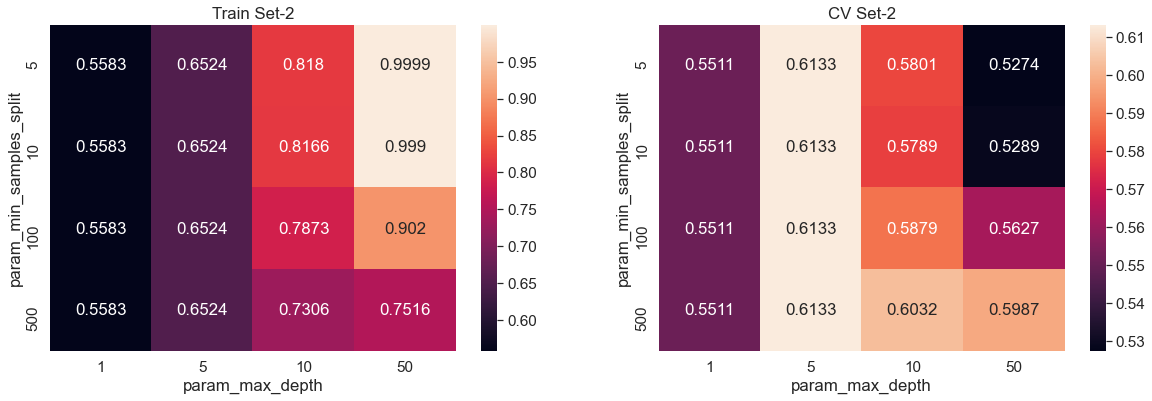

In [36]:
results_set2 = pd.DataFrame.from_dict(classifier_set2.cv_results_)

max_scores_set2 = results_set2.groupby(['param_min_samples_split', 'param_max_depth']).max()
max_scores_set2 = max_scores_set2.unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores_set2.mean_train_score, annot=True, fmt='.4g',ax=ax[0]);
sns.heatmap(max_scores_set2.mean_test_score, annot=True, fmt='.4g',ax=ax[1]);

ax[0].set_title('Train Set-2')
ax[1].set_title('CV Set-2')

## Model Training with best hyperparameter

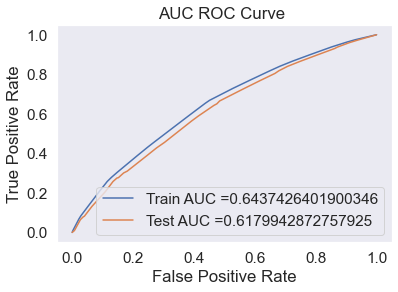

In [37]:
from sklearn.metrics import roc_curve, auc
classifier_2 = DecisionTreeClassifier(random_state=42,class_weight='balanced',min_samples_split=500,max_depth=5)
classifier_2.fit(x_train_set2,y_train)

y_pred_set2=classifier_2.predict(x_test_set2)
y_train_pred_set2 = classifier_2.predict_proba(x_train_set2)[:,1]     
y_test_pred_set2 = classifier_2.predict_proba(x_test_set2)[:,1] 

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred_set2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred_set2)

plt.plot(train_fpr2, train_tpr2, label="Train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="Test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC Curve ")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [38]:
best_t = find_best_threshold(tr_thresholds2, train_fpr2, train_tpr2)
print("Threshold", best_t)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred_set2, best_t)))
print("tn, fp, fn, tp", "=", confusion_matrix(y_train, predict_with_best_t(y_train_pred_set2, best_t)).ravel())
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred_set2, best_t)))
print("tn, fp, fn, tp", "=", confusion_matrix(y_test, predict_with_best_t(y_test_pred_set2, best_t)).ravel())

the maximum value of tpr*(1-fpr) 0.368 for threshold 0.534
Threshold 0.5344484197288699
Train confusion matrix
[[ 6232  4851]
 [21508 40605]]
tn, fp, fn, tp = [ 6232  4851 21508 40605]
Test confusion matrix
[[ 2864  2595]
 [10691 19902]]
tn, fp, fn, tp = [ 2864  2595 10691 19902]


<AxesSubplot:>

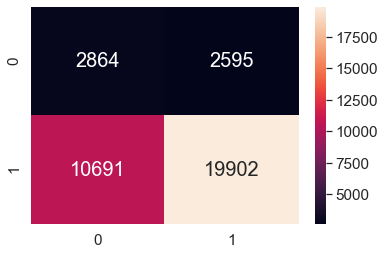

In [39]:
cf_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred_set2, best_t)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cf_test,annot=True, annot_kws={"size": 20},fmt ="g")

In [40]:
FP_datapoints2=[]
for i in range(len(y_test)):    
    if(y_test[i]==0 and y_pred_set2[i]==1 ):        
        FP_datapoints2.append(i)
FP_datapoints_essay2=[]
FP_datapoints_price2=[]
FP_datapoints_previous2=[]

for i in FP_datapoints2:
    FP_datapoints_essay2.append(X_test['essay'].values[i])
    FP_datapoints_price2.append(X_test['price'].values[i])
    FP_datapoints_previous2.append(X_test['teacher_number_of_previously_posted_projects'].values[i])

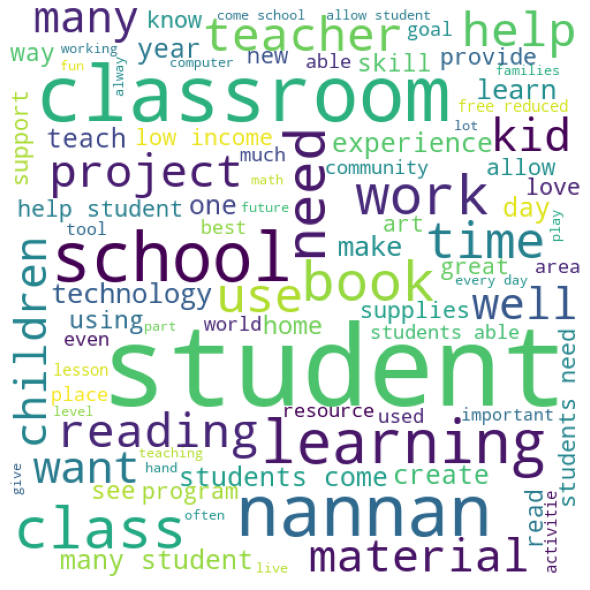

In [41]:
printWordCloud(FP_datapoints_essay2)

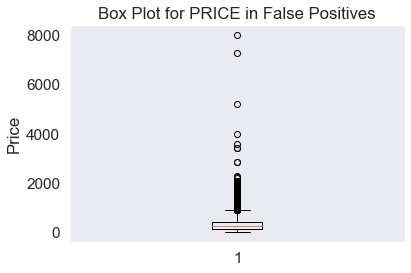

In [42]:
plt.boxplot(FP_datapoints_price2)
plt.title('Box Plot for PRICE in False Positives')
plt.ylabel('Price')
plt.grid()

No handles with labels found to put in legend.


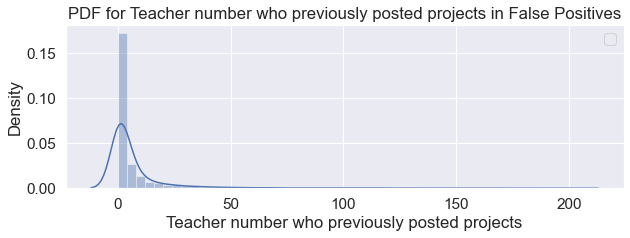

In [43]:
plt.figure(figsize=(10,3))
sns.distplot(FP_datapoints_previous2)
plt.title('PDF for Teacher number who previously posted projects in False Positives')
plt.xlabel('Teacher number who previously posted projects')
plt.legend()

## Task 2

In [44]:
nonzero=0
for i in range (len(classifier_.feature_importances_)):
    if(classifier_.feature_importances_[i]>0):
        nonzero=nonzero+1

print(nonzero)

85


In [45]:
nonzero_sort_train=x_train_set1[:,classifier_.feature_importances_.argsort()[::-1][:nonzero]]
nonzero_sort_test=x_test_set1[:,classifier_.feature_importances_.argsort()[::-1][:nonzero]]

In [46]:
nonzero_sort_train.shape

(73196, 85)

In [47]:
nonzero_sort_test.shape

(36052, 85)

In [48]:
dt_tfidf_set3 = DecisionTreeClassifier(random_state=42, class_weight='balanced')

parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
classifier_set3 = GridSearchCV(dt_tfidf, parameters, cv= 3, scoring='roc_auc',verbose=1,return_train_score=True,n_jobs=-1)
classifier_set3.fit(nonzero_sort_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [49]:
train_auc= classifier_set3.cv_results_['mean_train_score']
train_auc_std= classifier_set3.cv_results_['std_train_score']

cv_auc = classifier_set3.cv_results_['mean_test_score']
cv_auc_std= classifier_set3.cv_results_['std_test_score']

bestMaxDepth_set2=classifier_set3.best_params_['max_depth']
bestMinSampleSplit_set2=classifier_set3.best_params_['min_samples_split']

print("Depth: ",classifier_set3.best_params_['max_depth'])
print("Best Score: ",classifier_set3.best_score_)
print("Sample Split: ",classifier_set3.best_params_['min_samples_split'])

Depth:  10
Best Score:  0.6344622252779627
Sample Split:  500


Text(0.5, 1.0, 'CV Set-3')

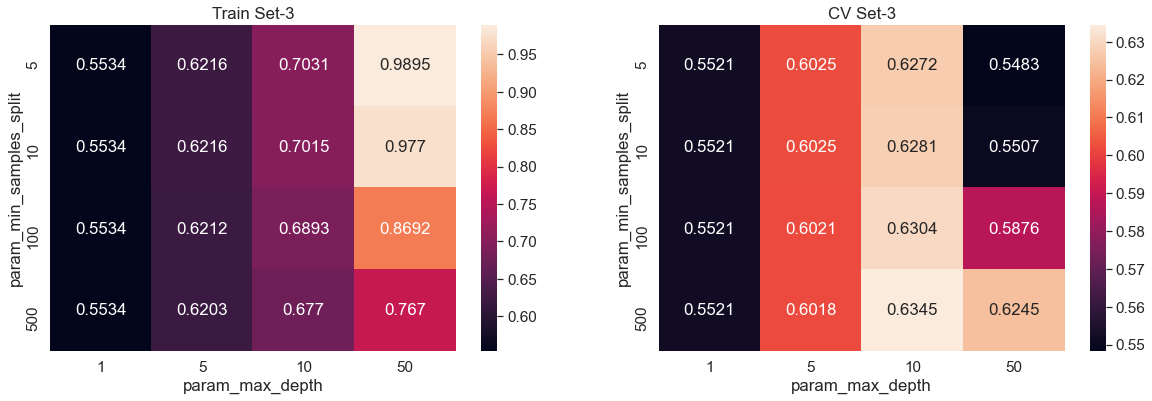

In [50]:
results_set3 = pd.DataFrame.from_dict(classifier_set3.cv_results_)

max_scores_set3 = results_set3.groupby(['param_min_samples_split', 'param_max_depth']).max()
max_scores_set3 = max_scores_set3.unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores_set3.mean_train_score, annot=True, fmt='.4g',ax=ax[0]);
sns.heatmap(max_scores_set3.mean_test_score, annot=True, fmt='.4g',ax=ax[1]);

ax[0].set_title('Train Set-3')
ax[1].set_title('CV Set-3')

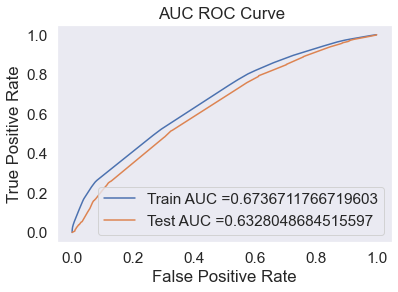

In [51]:
from sklearn.metrics import roc_curve, auc
classifier_3 = DecisionTreeClassifier(random_state=42,class_weight='balanced',min_samples_split=500,max_depth=10)
classifier_3.fit(nonzero_sort_train,y_train)

y_pred_set3=classifier_3.predict(nonzero_sort_test)
y_train_pred_set3 = classifier_3.predict_proba(nonzero_sort_train)[:,1]     
y_test_pred_set3 = classifier_3.predict_proba(nonzero_sort_test)[:,1] 

train_fpr3, train_tpr3, tr_thresholds3 = roc_curve(y_train, y_train_pred_set3)
test_fpr3, test_tpr3, te_thresholds3 = roc_curve(y_test, y_test_pred_set3)

plt.plot(train_fpr3, train_tpr3, label="Train AUC ="+str(auc(train_fpr3, train_tpr3)))
plt.plot(test_fpr3, test_tpr3, label="Test AUC ="+str(auc(test_fpr3, test_tpr3)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC Curve ")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [52]:
best_t = find_best_threshold(tr_thresholds3, train_fpr3, train_tpr3)
print("Threshold", best_t)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred_set3, best_t)))
print("tn, fp, fn, tp", "=", confusion_matrix(y_train, predict_with_best_t(y_train_pred_set3, best_t)).ravel())
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred_set3, best_t)))
print("tn, fp, fn, tp", "=", confusion_matrix(y_test, predict_with_best_t(y_test_pred_set3, best_t)).ravel())

the maximum value of tpr*(1-fpr) 0.37 for threshold 0.508
Threshold 0.5083568340008916
Train confusion matrix
[[ 7811  3272]
 [29516 32597]]
tn, fp, fn, tp = [ 7811  3272 29516 32597]
Test confusion matrix
[[ 3663  1796]
 [14790 15803]]
tn, fp, fn, tp = [ 3663  1796 14790 15803]


<AxesSubplot:>

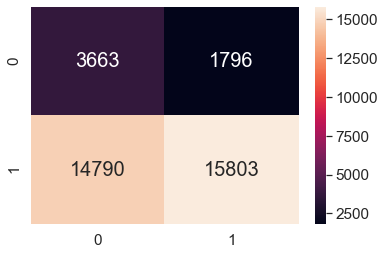

In [53]:
cf_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred_set3, best_t)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cf_test,annot=True, annot_kws={"size": 20},fmt ="g")

In [54]:
FP_datapoints3=[]
for i in range(len(y_test)):    
    if(y_test[i]==0 and y_pred_set2[i]==1 ):        
        FP_datapoints3.append(i)
FP_datapoints_essay3=[]
FP_datapoints_price3=[]
FP_datapoints_previous3=[]

for i in FP_datapoints3:
    FP_datapoints_essay3.append(X_test['essay'].values[i])
    FP_datapoints_price3.append(X_test['price'].values[i])
    FP_datapoints_previous3.append(X_test['teacher_number_of_previously_posted_projects'].values[i])

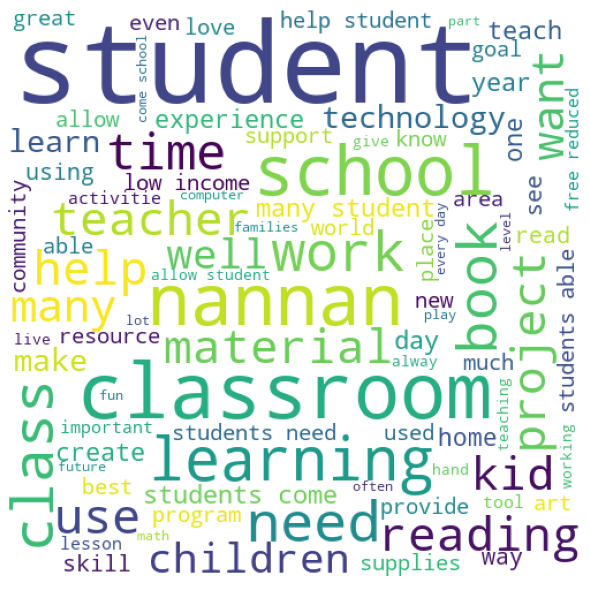

In [55]:
printWordCloud(FP_datapoints_essay3)

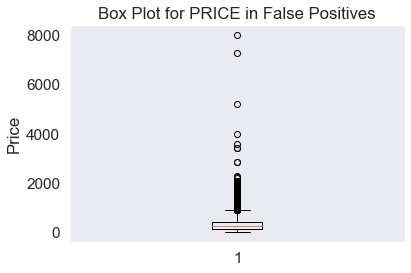

In [56]:
plt.boxplot(FP_datapoints_price3)
plt.title('Box Plot for PRICE in False Positives')
plt.ylabel('Price')
plt.grid()

No handles with labels found to put in legend.


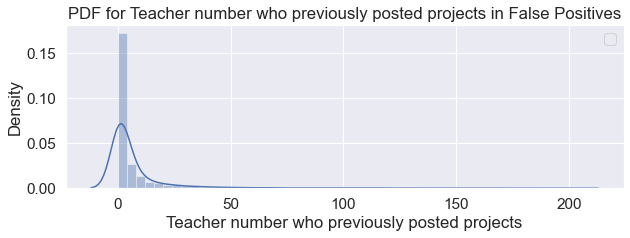

In [57]:
plt.figure(figsize=(10,3))
sns.distplot(FP_datapoints_previous3)
plt.title('PDF for Teacher number who previously posted projects in False Positives')
plt.xlabel('Teacher number who previously posted projects')
plt.legend()

## Logistic Regression on Set1 Important features only

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf=LogisticRegression()
grid_values={'penalty':['l1','l2'],'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
model2=GridSearchCV(estimator=clf,param_grid=grid_values,scoring='roc_auc', verbose=1, cv=3, n_jobs=-1)
model2.fit(nonzero_sort_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [59]:
model2.best_params_

{'C': 100, 'penalty': 'l2'}

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf=LogisticRegression()
grid_values={'penalty':['l2'],'C':[1000]}
model2=GridSearchCV(estimator=clf,param_grid=grid_values,scoring='roc_auc', verbose=1, cv=3, n_jobs=-1)
model2.fit(nonzero_sort_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1000], 'penalty': ['l2']}, scoring='roc_auc',
             verbose=1)

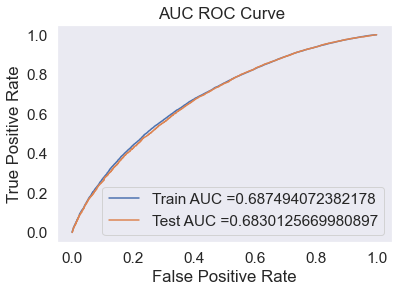

In [61]:
y=model2.predict(nonzero_sort_test)
y_train_prob=model2.predict_proba(nonzero_sort_train)[:,1]
y_test_prob = model2.predict_proba(nonzero_sort_test)[:,1] 

train_fpr4, train_tpr4, tr_thresholds4 = roc_curve(y_train, y_train_prob)
test_fpr4, test_tpr4, te_thresholds4 = roc_curve(y_test, y_test_prob)

plt.plot(train_fpr4, train_tpr4, label="Train AUC ="+str(auc(train_fpr4, train_tpr4)))
plt.plot(test_fpr4, test_tpr4, label="Test AUC ="+str(auc(test_fpr4, test_tpr4)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC Curve ")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [62]:
best_t = find_best_threshold(tr_thresholds4, train_fpr4, train_tpr4)
print("Threshold", best_t)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_prob, best_t)))
print("tn, fp, fn, tp", "=", confusion_matrix(y_train, predict_with_best_t(y_train_prob, best_t)).ravel())
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_prob, best_t)))
print("tn, fp, fn, tp", "=", confusion_matrix(y_test, predict_with_best_t(y_test_prob, best_t)).ravel())

the maximum value of tpr*(1-fpr) 0.407 for threshold 0.835
Threshold 0.83518724376883
Train confusion matrix
[[ 6837  4246]
 [21147 40966]]
tn, fp, fn, tp = [ 6837  4246 21147 40966]
Test confusion matrix
[[ 3336  2123]
 [10528 20065]]
tn, fp, fn, tp = [ 3336  2123 10528 20065]


<AxesSubplot:>

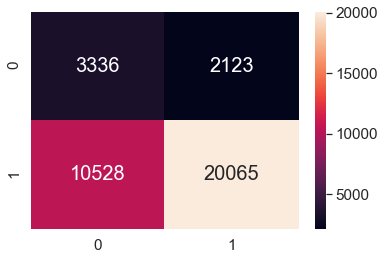

In [63]:
cf_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_prob, best_t)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cf_test,annot=True, annot_kws={"size": 20},fmt ="g")

In [64]:
FP_datapoints4=[]
for i in range(len(y_test)):    
    if(y_test[i]==0 and y[i]==1 ):        
        FP_datapoints4.append(i)
FP_datapoints_essay4=[]
FP_datapoints_price4=[]
FP_datapoints_previous4=[]

for i in FP_datapoints4:
    FP_datapoints_essay4.append(X_test['essay'].values[i])
    FP_datapoints_price4.append(X_test['price'].values[i])
    FP_datapoints_previous4.append(X_test['teacher_number_of_previously_posted_projects'].values[i])

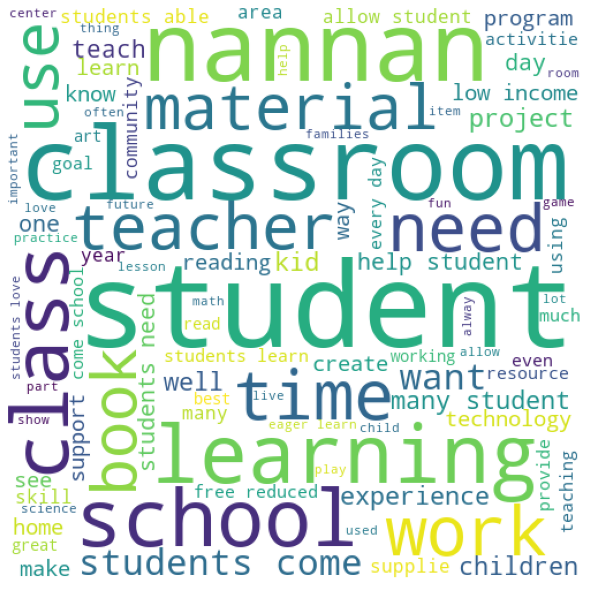

In [65]:
printWordCloud(FP_datapoints_essay4)

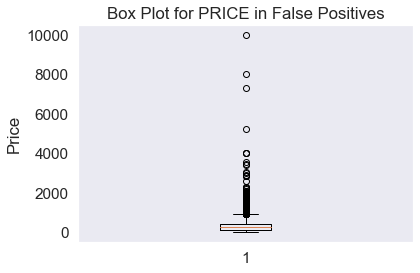

In [66]:
plt.boxplot(FP_datapoints_price4)
plt.title('Box Plot for PRICE in False Positives')
plt.ylabel('Price')
plt.grid()

No handles with labels found to put in legend.


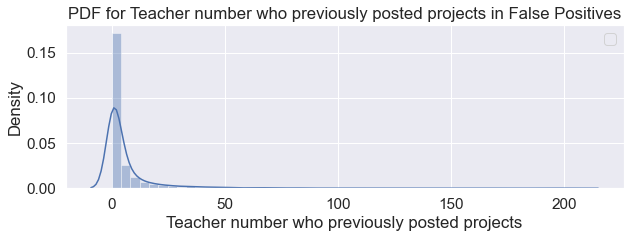

In [67]:
plt.figure(figsize=(10,3))
sns.distplot(FP_datapoints_previous4)
plt.title('PDF for Teacher number who previously posted projects in False Positives')
plt.xlabel('Teacher number who previously posted projects')
plt.legend()

In [68]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Minimum Sample Split","Maximum Dept", "Train AUC", "Test AUC"]
x.add_row(['tfidf', 'decision tree','500','10','0.68','0.62'])
x.add_row(['tfidf-word2vec', 'decision tree','500','5','0.64','0.60'])
x.add_row(['non-zero features of set1', 'decision tree','500','10','0.68','0.62'])
x.add_row(['non-zero features of set1', 'logistic regression','L2 Penalty','C=1000','0.68','0.62'])

print(x)

+---------------------------+---------------------+----------------------+--------------+-----------+----------+
|         Vectorizer        |        Model        | Minimum Sample Split | Maximum Dept | Train AUC | Test AUC |
+---------------------------+---------------------+----------------------+--------------+-----------+----------+
|           tfidf           |    decision tree    |         500          |      10      |    0.68   |   0.62   |
|       tfidf-word2vec      |    decision tree    |         500          |      5       |    0.64   |   0.60   |
| non-zero features of set1 |    decision tree    |         500          |      10      |    0.68   |   0.62   |
| non-zero features of set1 | logistic regression |      L2 Penalty      |    C=1000    |    0.68   |   0.62   |
+---------------------------+---------------------+----------------------+--------------+-----------+----------+
